
 ## **Predicting A Tennis Match Outcome Based On Player Rank Points, Rank and Number Of Aces.**
 
### **Introduction** 
    The Association of Tennis Professionals (ATP) uses a computer ranking system to determine who can enter their tournaments and provide an unbiased analysis of the performance of the tennis players.The tennis match data was originally collected by the Association of Tennis Professionals, and were compiled into datasets by Jeff Sackmann, which we will be using. While the data includes statistics from all ATP matches since 1968, we will only be using the most relevant data from the past ten years (2014-2023). Our project will be answering the question of how a tennis player's rank points, rank, number of double faults, and number of aces in a match can be used to predict their likelihood of winning a tennis match. 
    Our main argument is that we believe that a tennis player will be more likely to win a match if they have higher rank points, a higher rank, less double faults, and more aces than their competitor. Because rank points and rank are calculated based off of player performance in previous matches, we will predict that a higher rank, as well as higher rank points are likely to predict the outcome of a match as a win. Additionally, we predict that victory can also be predicted by a higher number of aces. Aces are a dominant type of round victory that is determined by the outcome of a single rally. We predict that a higher number of aces will reflect a more skilled player, and thus predict victory. On the contrary, double faults are signs of poor player performance, as these represent two mistakes in a row leading to a round lost. Thus, we predict that players with less double faults will be likely to win. 


In [28]:
library(tidyverse)
library(tidymodels)
set.seed(1)
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



README

Prior to downloading the files below, please ensure a 'data' folder is present in your current directory. 


In [2]:
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv', "data/data2014.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv', "data/data2015.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv', "data/data2016.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv', "data/data2017.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv', "data/data2018.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv', "data/data2019.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv', "data/data2020.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv', "data/data2021.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv', "data/data2022.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv', "data/data2023.csv")

In [29]:
data2014<- read_csv("data/data2014.csv")
data2015<- read_csv("data/data2015.csv")
data2016<- read_csv("data/data2016.csv")
data2017<- read_csv("data/data2017.csv")
data2018<- read_csv("data/data2018.csv")
data2019<- read_csv("data/data2019.csv")
data2020<- read_csv("data/data2020.csv")
data2021<- read_csv("data/data2021.csv")
data2022<- read_csv("data/data2022.csv")
data2023<- read_csv("data/data2023.csv")

Rows: 2901 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2943 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2941 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tou

## **Methods** 

### **Data Wrangling**
 
    To build a model to predict tennis match outcomes, we had to filter our dataset to only include relevant data columns. Before beginning our analysis, we loaded tidyverse and tidymodels, and set our seed to 1. We downloaded all the necessary data from the githubusercontent website and read all of our data by year. Using rbind, we created a combined master dataset called “gigadata” from the years 2014-2023. We then selected the column categories of the aces, rank points, rank, double faults, age, and height for both the winners and losers. Aces, rank, rank points, and double faults are our explanatory variables while status is our response variable. Unfortunately, this dataset was not tidy as it did not have a distinct category for “win” or “loss”. Rather, it had separate columns for both the winner and loser of each category, ex. w_aces, l_aces, w_rank, l_rank, etc. In order to tidy the dataset, we separated our gigadata object into the winner or “w” columns and the loser or “l” categories into winner and loser datasets. Once separated, we mutated a column into each dataset with “win” or “loss” under an as.factor column called “status”. We then renamed the categories to remove the “l” or “w” by mutating them both to the same name. For example, we changed “l_aces” and “w_aces” both to just “aces” using the mutate function. Afterwards, we combined both datasets using the rbind() command, giving us all our data along with a categorical column called “status” that denoted a win or a loss. Additionally, preliminary exploratory data analysis involved mutating the training data to change ace, rank points and rank to be numeric. We used this to create a bar graph to show the average ace, rank points, and rank of winners and losers in our proposal (not in final project)






We must first begin by combining all of our datasets into one. We will call this object "gigadata" and then proceed to select only the categories that interest us in an object called "selected_gigadata" 

In [72]:
gigadata <- rbind(data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022, data2023) 

selected_gigadata<- select(gigadata, w_ace, l_ace, winner_rank_points, loser_rank_points, loser_rank, winner_rank, winner_ht, loser_ht, winner_age, loser_age, l_df, w_df )
head(selected_gigadata)

w_ace,l_ace,winner_rank_points,loser_rank_points,loser_rank,winner_rank,winner_ht,loser_ht,winner_age,loser_age,l_df,w_df
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,9,1090,425,136,39,185,183,32.4,21.9,7,3
11,14,774,1160,35,61,194,185,28.3,32.0,1,3
18,4,960,1244,29,46,198,185,26.2,31.0,0,1
23,5,307,549,100,172,193,183,26.1,21.6,4,2
15,13,918,697,70,50,190,190,31.9,26.3,2,4
10,4,1175,784,59,34,188,183,26.8,25.5,3,2


However, our dataset is not tidy because our observations contain more than one piece of information. In addition to our category of interest, they are combined with the classifier of "win" or "loss", designated with a "w_" or "l_" in front of the category name. To tidy this, we will begin by splitting up our dataset into winner and loser datasets

In [76]:

w_gigadata<- select(selected_gigadata, w_ace, winner_rank_points, winner_rank, w_df, winner_age, winner_ht)
l_gigadata<- select(selected_gigadata, l_ace, loser_rank_points, loser_rank, l_df, loser_age, loser_ht)



Now that we have separated our dataset, we will mutate in the column "status" and make it as.factor in order to have a categorical variable assigned to each dataset, as "win" or "loss". Additionally, we will rename the data category columns so that they are the same within the two datasets, removing the "w_" or "l_" or "winner", etc, in front of the category name. 

In [77]:
w_gigadata<- mutate(w_gigadata, status = "win") |>
                mutate(status = as.factor(status)) |>
                rename("ace" = w_ace, "rank_points" = winner_rank_points, "rank" = winner_rank, "age" = winner_age, "height" = winner_ht, "dbl_fault" = w_df)
head(w_gigadata)

l_gigadata<- mutate(l_gigadata, status = "loss") |>
                mutate(status = as.factor(status)) |>
                rename("ace" = l_ace, "rank_points" = loser_rank_points, "rank" = loser_rank, "age" = loser_age, "height" = loser_ht, "dbl_fault" = l_df)
head(l_gigadata)

ace,rank_points,rank,dbl_fault,age,height,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,1090,39,3,32.4,185,win
11,774,61,3,28.3,194,win
18,960,46,1,26.2,198,win
23,307,172,2,26.1,193,win
15,918,50,4,31.9,190,win
10,1175,34,2,26.8,188,win


ace,rank_points,rank,dbl_fault,age,height,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9,425,136,7,21.9,183,loss
14,1160,35,1,32.0,185,loss
4,1244,29,0,31.0,185,loss
5,549,100,4,21.6,183,loss
13,697,70,2,26.3,190,loss
4,784,59,3,25.5,183,loss


Now that our two datasets are properly tidy with our distinct classifier column, we can bind them together using the rbind() function 

In [78]:
new_data<- rbind(w_gigadata, l_gigadata)
glimpse(new_data)

Rows: 54,934
Columns: 7
$ ace         <dbl> 5, 11, 18, 23, 15, 10, 13, 4, 31, 6, 14, 5, 9, 4, 18, 10, …
$ rank_points <dbl> 1090, 774, 960, 307, 918, 1175, 1310, 780, 369, 1520, 1130…
$ rank        <dbl> 39, 61, 46, 172, 50, 34, 28, 60, 147, 23, 37, 68, 6, 61, 1…
$ dbl_fault   <dbl> 3, 3, 1, 2, 4, 2, 3, 1, 2, 1, 7, 7, 0, 3, 7, 3, 2, 0, 4, 1…
$ age         <dbl> 32.4, 28.3, 26.2, 26.1, 31.9, 26.8, 32.2, 32.8, 23.2, 22.6…
$ height      <dbl> 185, 194, 198, 193, 190, 188, 188, 180, 193, 188, 198, 188…
$ status      <fct> win, win, win, win, win, win, win, win, win, win, win, win…


Now, we can make our training and testing split.

In [79]:
tennis_split <- initial_split(new_data, prop = 0.75, strata = status)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)


head(tennis_train)
nrow(tennis_train)

ace,rank_points,rank,dbl_fault,age,height,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,1160,35,1,32.0,185,loss
4,1244,29,0,31.0,185,loss
5,549,100,4,21.6,183,loss
4,784,59,3,25.5,183,loss
4,721,67,2,26.0,183,loss
8,41,628,5,17.7,196,loss


[1] 41200

Additionally, we must get rid of any columns with an NA, as this may interfere with our model. 

In [80]:
tennis_train <- tennis_train |>
    na.omit()
head(tennis_train)

ace,rank_points,rank,dbl_fault,age,height,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,1160,35,1,32.0,185,loss
4,1244,29,0,31.0,185,loss
5,549,100,4,21.6,183,loss
4,784,59,3,25.5,183,loss
4,721,67,2,26.0,183,loss
8,41,628,5,17.7,196,loss


In [81]:
tennis_test <- tennis_test |> 
    na.omit()
head(tennis_test)

ace,rank_points,rank,dbl_fault,age,height,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,1090,39,3,32.4,185,win
11,774,61,3,28.3,194,win
5,706,68,7,26.0,188,win
16,1130,37,4,25.2,198,win
5,780,60,1,32.8,180,win
7,780,60,3,32.8,180,win


## **Methods**
### **Exploratory Data Analysis**

   Before we make our model, it is important to determine which factors would most likely play a role in determining victory of a tennis match. To do this, we made four figures to see the relationship of how the average number of aces, the average rank, the average rank points, and the average number of double faults compare between winners and losers of tennis matches. 
Figures 1, 3, and 4 all align with our original hypotheses. We predicted that winners would have a higher number of aces, a higher number of ranking points, and a lower number of double faults than losers did, making these good predictors of victory vs loss. However, rank failed to align with our original hypothesis. Surprisingly, the average ranking of a player is higher for losing games rather than winning. Further analysis needs to be done in order to explore this seemingly contradictory result. Although we wanted to discard this part of the model, we were advised by our TA to include it, as it can still help to predict a winning vs losing outcome, and so we have included it in recipe 1. However, the most accurate model turned out to be Recipe 3, one that did not include rank points. That being said, we will consider ace, rank points, ranking, and double faults as predictor variables when creating our classification model. 
    

   
   Our basic tables summarizes the average number of aces, rank points, double faults, and ranking per the status of winning and losing a game. We can visualize our predictors in a simple bar graph. These visualizations shows that the average number of aces and rank points are higher for winning games than losing. Additionally, the average number of double faults is lower in winners than it is in losers. This tells us that a higher number of average aces, a higher rank points, and a lower number of double faults may be useful variables that can be used to predict a winning tennis game.


In [89]:
rank_points_double<- mutate(new_data, rank_points= as.numeric(rank_points))
double_graph<- mutate(rank_points_double, rank= as.numeric(rank))
double_graph<- mutate(double_graph, ace= as.numeric(ace))
head(double_graph)

ace,rank_points,rank,dbl_fault,age,height,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,1090,39,3,32.4,185,win
11,774,61,3,28.3,194,win
18,960,46,1,26.2,198,win
23,307,172,2,26.1,193,win
15,918,50,4,31.9,190,win
10,1175,34,2,26.8,188,win


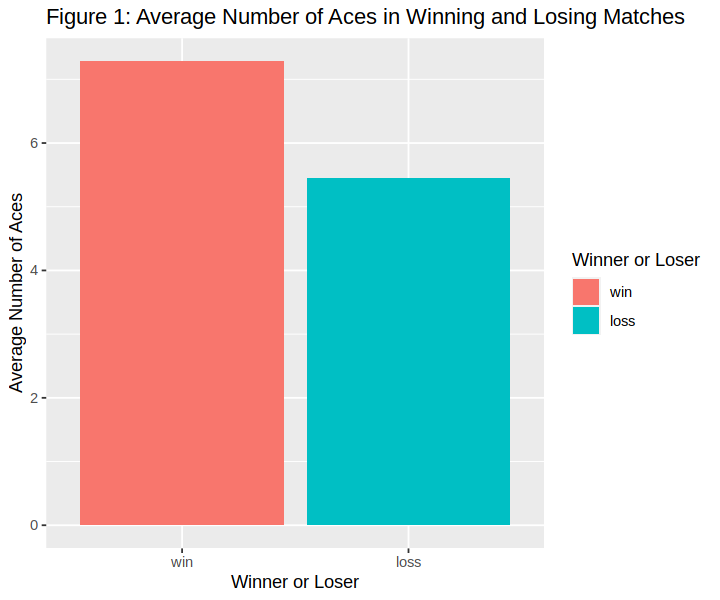

In [84]:
ace_tbl<- double_graph|> 
            group_by(status)|>
            summarize( average_aces = mean(ace, na.rm= TRUE))

ace_bar<- ggplot(ace_tbl, aes(x= status, y = average_aces, fill=status)) + 
    geom_bar(stat="identity") +
    labs(x = "Winner or Loser", y = "Average Number of Aces", fill = "Winner or Loser") +
    ggtitle("Figure 1: Average Number of Aces in Winning and Losing Matches")

ace_bar



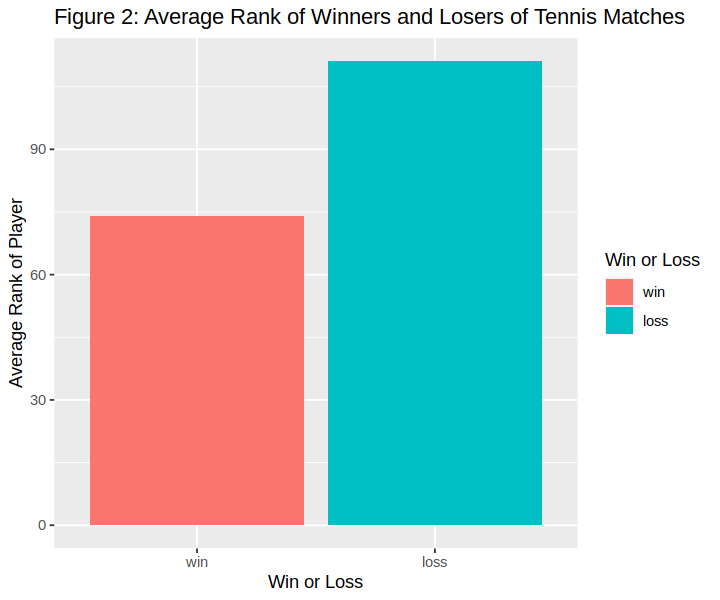

In [85]:
ranking_data <- new_data|>
    group_by(status) |>
    summarize( average_rank = mean(rank, na.rm = TRUE))

ranking_data |> 

ggplot(aes(x=status, y =average_rank, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank of Player", fill = "Win or Loss") + 
    ggtitle("Figure 2: Average Rank of Winners and Losers of Tennis Matches")

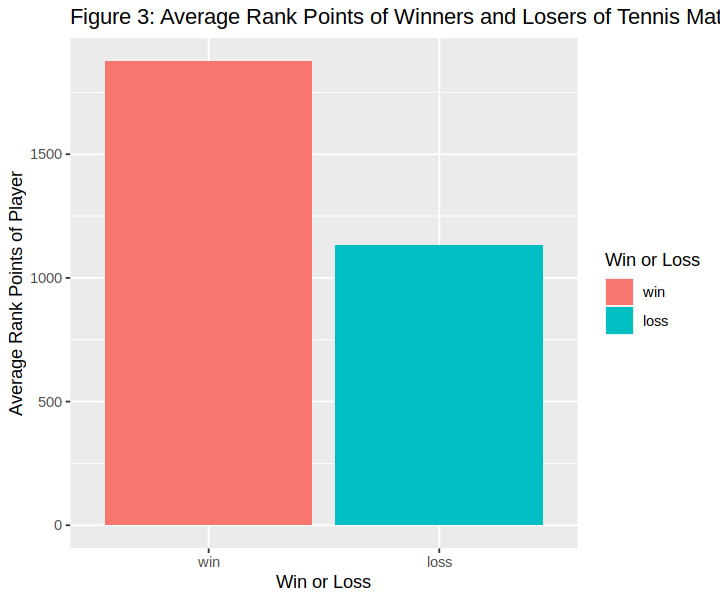

In [86]:
rank_point_data <- new_data|>
    group_by(status) |>
    summarize( average_dbl = mean(rank_points, na.rm = TRUE))

ranking_points_data |> 

ggplot(aes(x=status, y =average_rank_points, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank Points of Player", fill = "Win or Loss") + 
    ggtitle("Figure 3: Average Rank Points of Winners and Losers of Tennis Matches")

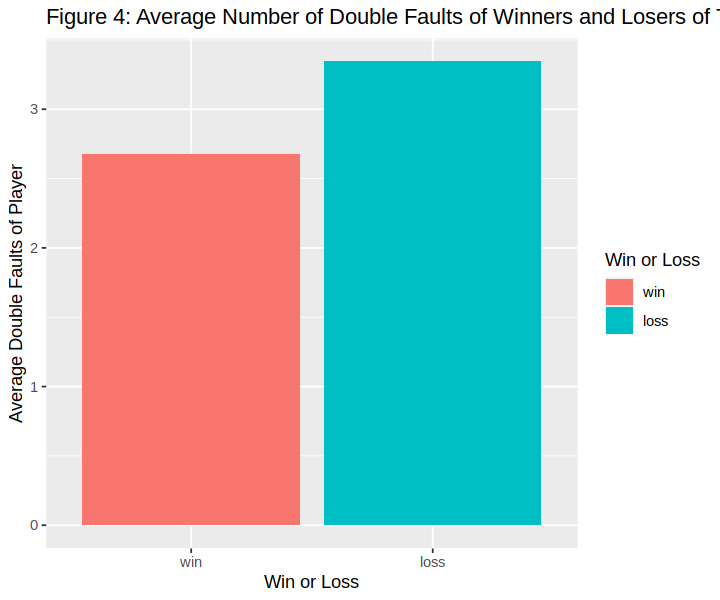

In [87]:
fault_data <- new_data|>
    group_by(status) |>
    summarize(average_dbl_fault = mean(dbl_fault, na.rm = TRUE))

fault_data |> 
ggplot(aes(x=status, y =average_dbl_fault, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Double Faults of Player", fill = "Win or Loss") + 
    ggtitle("Figure 4: Average Number of Double Faults of Winners and Losers of Tennis Matches")

## **Methods**
### **Making the Classification Model**

    Currently, 3 of our 4 predicted metrics align with our visualizations, which could help form our model. Winner do in fact, tend to have more aces. Additionally, winners also tend to have less double faults and tend to be higher in ranking points as well. Oddly enough, losers had a higher ranking than winners did. As this does not align with our model, we will exclude it in certain recipes.

    We decided to use a knn classification model. The split we used was 75% training data and 25% testing data. This method will randomly extract the data without the effect of sorting and stratify the data by status label so that status has the same proportion in the testing and training sets. We pre-processed the data, making sure that our test data does not affect any aspect of the model training.

    We then created a model specification with tuning on the number of neighbours and performed a 5-fold cross-validation on the training set. We created 3 different recipes with the training set. Recipe 1 included all the variables. Recipe 2 included the ace, rank points, age, and height, and Recipe 3 included ace, rank point, double fault, and age. To make our status prediction, we made our K-nearest neighbour classifier into the workflow. We then graphed the accuracy for each k- number of neighbours 10, 25, 50, 125, and 300. Using a scatter plot, we chose 125 as the best for our classification as this was the point when the accuracy no longer increased significantly. We then recreated a new recipe with rank points, rank, and ace, and our model specification with 125 neighbours. After, we ran the workflow with our new recipe and model specification. Then, created a new observation and tested our classification to predict whether or not our new observation would win or lose. 

    From there, we made predictions with our test data and the knn classification. We performed a 10-fold cross-validation with the training set. We fine-tuned our model using k values from 1 to 150 by 5. We then filtered the results by accuracy which we found our model to be 63% accurate. This is not ideal because it shows that our model is not in the optimal accuracy range. Therefore, it may not be ideal to use aces, rank points and double faults to predict if a tennis player will win or lose the match. Some reasons as to why our model did not perform very well could be that the above metrics are not good indicators of victory or loss. Additionally, we may have a limited dataset that does not contain other important factors that may be needed in order to more accurately predict victory or loss. 

In [91]:
set.seed(10)

options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")


tennis_vfold <- vfold_cv(tennis_train, v = 5, strata = status)


tennis_recipe <- recipe(status ~ ., data = tennis_train)
tennis_recipe2 <- recipe(status ~ ace + rank_points + age + height, data= tennis_train)
tennis_recipe3 <- recipe(status ~ ace + rank_points + dbl_fault + age, data= tennis_train)

In [92]:
knn_results <- workflow() |>
                 add_recipe(tennis_recipe3) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = tennis_vfold, grid = tibble(neighbors = c(10, 25, 50, 125, 300))) |>
                 collect_metrics()



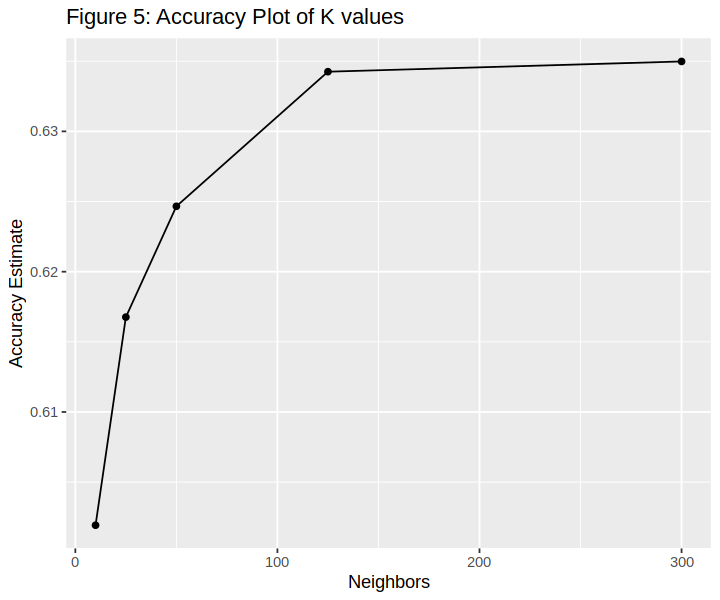

In [93]:
accuracy <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  ggtitle("Figure 5: Accuracy Plot of K values")
              
cross_val_plot 

The slope of our K value seems to significantly taper off at the 125 mark, so we will select this as our final K value for this model

In [40]:
tennis_recipe <- recipe(status ~ rank_points + rank + ace, 
                        data = tennis_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [41]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 125) |>
  set_engine("kknn") |>
  set_mode("classification")

In [42]:
knn_fit <- workflow() |>
  add_recipe(tennis_recipe3) |>
  add_model(knn_spec) |>
  fit(data = tennis_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(125,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3660363
Best kernel: rectangular
Best k: 125

Now that we've made our model, we will test it with a "dummy observation" 

In [43]:
#This is a made-up row to test our model
new_observation <- tibble(rank = 48, rank_points = 1500, ace = 10, dbl_fault = 3, age = 29)
prediction <- predict(knn_fit, new_observation)

prediction

.pred_class
<fct>
win


Now that our model seems to work, we will now use our testing set on it

In [44]:
tennis_predictions <- predict(knn_fit, tennis_test) |>
    bind_cols(tennis_test)
head(tennis_predictions)



.pred_class,ace,rank_points,rank,dbl_fault,age,height,status
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
win,23,307,172,2,26.1,193,win
win,6,1520,23,1,22.6,188,win
loss,14,1130,37,7,25.2,198,win
loss,4,774,61,3,28.3,194,win
loss,18,307,172,7,26.1,193,win
win,10,1175,34,3,26.8,188,win


In [45]:
tennis_accuracy <- tennis_predictions |>
  metrics(truth = status, estimate = .pred_class) |>
  filter(.metric == "accuracy")
 
tennis_accuracy

tennis_conf_mat <- tennis_predictions |>
             conf_mat(truth = status, estimate = .pred_class)

tennis_conf_mat


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6332448


          Truth
Prediction  win loss
      win  3858 2109
      loss 2584 4245

In [54]:
tennis_vfold <- vfold_cv(tennis_train, v = 10, strata = status)

k_vals <- tibble(neighbors = seq(from = 10, to = 150, by = 10))

knn_results <- workflow() |>
  add_recipe(tennis_recipe3) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = tennis_vfold) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6332852,10,0.002059356,Preprocessor1_Model1


## **Discussion**
	Before starting the experiment, we thought that players' rank points, double faults, and aces affected their likelihood of winning a tennis match. After conducting the experiment, we found our model to not be entirely accurate with only a 63% accurate rate when using 125 neighbours. This is slightly concerning because it means that these 3 variables in our recipe are not creating the most accurate results. This is certainly not what we expected, given that our initial exploratory data analysis yielded promising trends. We tried to change our predictor variables using multiple recipes, but the highest accuracy we could obtain was 63%. Thus, classification might not be the best type of analysis for this specific dataset. An extension for this project would be to do a linear or knn regression to see if we can get an accurate prediction for a different variable, such as ranking or rank points. 
    
    However, it is entirely possible that this dataset lacks the necessary data to be able to predict victory/loss. While our original project set out to see if predicting victory or loss is even possible using various metrics, it is also entirely possible that the victory or loss of a tennis match is too fluid and dynamic of an outcome that cannot accurately be predicted using a classification model. Thus, these impacts could potentially indicate that no matter how low one’s ranking points, how many double faults received, or how little aces struck, a player can still achieve victory during high level tennis matches






## **Conclusion**
    In conclusion, our study aimed to predict tennis match outcomes based on player statistics, particularly focusing on rank points, rank, number of double faults, and the number of aces. Our main hypothesis was that players with higher rank points, a higher rank, less double faults,  and more aces would be more likely to win matches.To test our hypothesis, we employed a k-nearest neighbours (KNN) classification model, utilising the tidyverse and tidymodels packages. The model was trained on a dataset that included variables such as aces, rank points, rank, double faults, age, and height for both winners and losers. The KNN classification model was then applied to predict match outcomes, and we fine-tuned the model through 5-fold cross-validation and parameter tuning. Our findings supported our initial expectations as it did predict victory or loss better than chance would, however our model was not accurate as we hoped it to be. It revealed that a higher average number of aces and rank points, and double faults are only somewhat correlated with an increased probability of winning.  Our research not only validates our initial hypothesis, but demonstrates the practical application of predictive modelling in the tennis industry. By utilising data and analytics, players and organisations are able to make informed decisions, ultimately contributing to the growth and development of the sport.


## **References**
    Tennis Rankings explained. Wilson Sporting Goods. (2023, October 17). https://www.wilson.com/en-us/blog/tennis/how-tos/tennis-rankings-explained 
    
    ATP Tour. Official Site of Men’s Professional Tennis | ATP Tour | Tennis. (n.d.). https://www.atptour.com/en/rankings/rankings-faq. 